# Car License Plate Recognition

> The motive is to localize the license plate and recognize license text and number from the plate. 

### Credits: https://youtu.be/0-4p_QgrdbE

# 0. Setup Paths

In [1]:
import os

In [2]:
# Defining TF Object Detection model name, it's download path and label map.
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
import sys
sys.version

'3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]'

In [4]:
# Defining the paths of the workspace directory.
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [5]:
# Defining the the paths of the files.
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [6]:
# Creating the above directories if it is not present.
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# Installing wget module.
# It is the URL network downloader that directly download the files from the main server.
if os.name=='nt': # "nt" represents Windows OS.
    !pip install wget
    import wget

In [8]:
# Cloning the Tensorflow models repository.
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  86% (2472/2861)
Updating files:  87% (2490/2861)
Updating files:  88% (2518/2861)
Updating files:  89% (2547/2861)
Updating files:  90% (2575/2861)
Updating files:  91% (2604/2861)
Updating files:  92% (2633/2861)
Updating files:  93% (2661/2861)
Updating files:  94% (2690/2861)
Updating files:  95% (2718/2861)
Updating files:  96% (2747/2861)
Updating files:  97% (2776/2861)
Updating files:  98% (2804/2861)
Updating files:  99% (2833/2861)
Updating files: 100% (2861/2861)
Updating files: 100% (2861/2861), done.


In [9]:
# Install Tensorflow Object Detection     
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 67% [.................................................                         ]  991232 / 1468733

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
Traceback (most recent call last):
  File "D:\License Plate\anpr\lib\site-packages\setuptools\sandbox.py", line 154, in save_modules
    yield saved
  File "D:\License Plate\anpr\lib\site-packages\setuptools\sandbox.py", line 195, in setup_context
    yield
  File "D:\License Plate\anpr\lib\site-packages\setuptools\sandbox.py", line 250, in run_setup
    _execfile(setup_script, ns)
  File "D:\License Plate\anpr\lib\site-packages\setuptools\sandbox.py", line 45, in _execfile
    exec(code, globals, locals)
  File "C:\Users\Harish\AppData\Local\Temp\easy_install-8n1hxiwj\pycocotools-2.0.4\setup.py", line 7, in <module>
    # Required for apache-beam with PY3
Mod

copying object_detection\models\feature_map_generators.py -> build\lib\object_detection\models
copying object_detection\models\feature_map_generators_test.py -> build\lib\object_detection\models
copying object_detection\models\ssd_efficientnet_bifpn_feature_extractor.py -> build\lib\object_detection\models
copying object_detection\models\ssd_efficientnet_bifpn_feature_extractor_tf2_test.py -> build\lib\object_detection\models
copying object_detection\models\ssd_feature_extractor_test.py -> build\lib\object_detection\models
copying object_detection\models\ssd_inception_v2_feature_extractor.py -> build\lib\object_detection\models
copying object_detection\models\ssd_inception_v2_feature_extractor_tf1_test.py -> build\lib\object_detection\models
copying object_detection\models\ssd_inception_v3_feature_extractor.py -> build\lib\object_detection\models
copying object_detection\models\ssd_inception_v3_feature_extractor_tf1_test.py -> build\lib\object_detection\models
copying object_detection\

Obtaining file:///D:/License%20Plate/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Running setup.py develop for slim


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-mod

In [23]:
!pip list

Package                      Version   Editable project location
---------------------------- --------- ------------------------------------------------
absl-py                      1.0.0
asttokens                    2.0.5
astunparse                   1.6.3
backcall                     0.2.0
black                        21.12b0
cachetools                   4.2.4
certifi                      2021.10.8
charset-normalizer           2.0.10
click                        8.0.3
colorama                     0.4.4
cycler                       0.11.0
debugpy                      1.5.1
decorator                    5.1.1
entrypoints                  0.3
executing                    0.8.2
flatbuffers                  2.0
gast                         0.4.0
google-auth                  2.3.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.43.0
h5py                         3.6.0
idna                         3.3
importlib-metadata           4.10.1
ipy

In [21]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation of Tensorflow Object Detection modules.
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.8: D:\License Plate\anpr\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-01-24 19:58:23.940526: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-24 19:58:25.012760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3493 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
D:\License Plate\anpr\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC me

I0124 19:58:30.360273 39668 efficientnet_model.py:147] round_filter input=16 output=16
I0124 19:58:30.436284 39668 efficientnet_model.py:147] round_filter input=16 output=16
I0124 19:58:30.436284 39668 efficientnet_model.py:147] round_filter input=24 output=24
I0124 19:58:30.568321 39668 efficientnet_model.py:147] round_filter input=24 output=24
I0124 19:58:30.568321 39668 efficientnet_model.py:147] round_filter input=40 output=48
I0124 19:58:30.712862 39668 efficientnet_model.py:147] round_filter input=40 output=48
I0124 19:58:30.712862 39668 efficientnet_model.py:147] round_filter input=80 output=88
I0124 19:58:30.900914 39668 efficientnet_model.py:147] round_filter input=80 output=88
I0124 19:58:30.900914 39668 efficientnet_model.py:147] round_filter input=112 output=120
I0124 19:58:31.088963 39668 efficientnet_model.py:147] round_filter input=112 output=120
I0124 19:58:31.088963 39668 efficientnet_model.py:147] round_filter input=192 output=208
I0124 19:58:31.325026 39668 efficient

In [20]:
!pip install pyyaml

  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.
tf-models-official 2.7.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.7.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.7.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.7.0 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires sacrebleu, which is not installed.
tf-models-official 2.7.0 requires sentencepiece, which is not installed.
tf-model

In [18]:
!pip install Pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.
tf-models-official 2.7.0 requires opencv-python-headless, whic

In [12]:
!pip install tensorflow==2.7.0 tensorflow-gpu==2.7.0 --upgrade

  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached grpcio-1.43.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached protobuf-3.19.3-cp38-cp38-win_amd64.whl (895 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Using cached libclang-12.0.0-2-py2.py3-none-win_amd64.whl (13.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth-2.3.3-py2.py3-none-any.whl (155 kB)
  Using cached requests-2.27.1-py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-mod

In [15]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.19.3
Uninstalling protobuf-3.19.3:
  Successfully uninstalled protobuf-3.19.3


  Using cached protobuf-3.19.3-cp38-cp38-win_amd64.whl (895 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-win_amd64.whl (52 kB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.7.0 requires Cython, which is not installed.
tf-models-official 2.7.0 requires gin-config, which is not installed.
tf-models-official 2.7.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.7.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.7.0 requires oauth2client, which is not installed.


In [6]:
import object_detection

In [11]:
# Downloading the above mentioned pre-trained model. 
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  8% [......                                                                  ]  1712128 / 20515344

 25% [..................                                                      ]  5242880 / 20515344

 38% [...........................                                             ]  7823360 / 20515344

 56% [........................................                                ] 11550720 / 20515344

 73% [....................................................                    ] 14999552 / 20515344

 86% [..............................................................          ] 17842176 / 20515344

 99% [....................................................................... ] 20406272 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Data

> Car License plate dataset is obtained from https://www.kaggle.com/andrewmvd/car-plate-detection.

> This dataset contains 433 images with bounding box annotations of the car license plates within the image.
Annotations are provided in the PASCAL VOC format.

> PASCAL VOC Format: It is a XML file, with bounding box co-ordinates as **(xmin-top left, ymin-top left,xmax-bottom right, ymax-bottom right)**.

Creating the Train and Test Datasets.

In [7]:
import os
import glob
import shutil

In [10]:
train_folder = os.path.join('D:\\', 'License Plate', 'Tensorflow', 'workspace', 'images', 'Train')
test_folder = os.path.join('D:\\', 'License Plate', 'Tensorflow', 'workspace', 'images', 'Test')

In [27]:
Annotations_path = os.path.join('D:\\', 'License Plate', 'Tensorflow', 'workspace', 'images', 'archive', 'annotations')
Images_path = os.path.join('D:\\', 'License Plate', 'Tensorflow', 'workspace', 'images', 'archive', 'images')

In [28]:
Images = os.listdir(Images_path)
Annotations = os.listdir(Annotations_path)

In [29]:
len(Images), len(Annotations)

(433, 433)

In [19]:
!pip install scikit-learn

  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
images_train, images_val, annotations_train, annotaions_val = train_test_split(Images, Annotations, test_size = 0.07, random_state = 0)
len(images_train), len(images_val)

(402, 31)

In [32]:
images_train[0:5], images_val[0:5]

(['Cars217.png', 'Cars383.png', 'Cars389.png', 'Cars417.png', 'Cars415.png'],
 ['Cars428.png', 'Cars20.png', 'Cars92.png', 'Cars387.png', 'Cars107.png'])

In [33]:
annotations_train[0:5], annotaions_val[0:5]

(['Cars217.xml', 'Cars383.xml', 'Cars389.xml', 'Cars417.xml', 'Cars415.xml'],
 ['Cars428.xml', 'Cars20.xml', 'Cars92.xml', 'Cars387.xml', 'Cars107.xml'])

In [34]:
# Copying the respective Train images and annotaions.
for img, annot in zip(images_train, annotations_train):
    shutil.copy(os.path.join(Images_path, img), train_folder)
    shutil.copy(os.path.join(Annotations_path, annot), train_folder)

In [35]:
# Copying the respective Test images and annotations.
for img, annot in zip(images_val, annotaions_val):
    shutil.copy(os.path.join(Images_path, img), test_folder)
    shutil.copy(os.path.join(Annotations_path, annot), test_folder)

# 3. Create Label Map

In [8]:
# Creating the label for detection using label map.
# Here we have only one label.
# The label name given here must be same as the name given in the XML file, otherwise it affects the procedure.
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 4. Create TF records

In [37]:
# Cloning the TF record generation script.
# Note: Change the index of object member to 5 to get box co-ordinates in xml_to_csv function.
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [38]:
!pip install pytz

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)


In [39]:
# Creating the TF record files for Train and Test data.
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'Test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 5. Copy Model Config to Training Folder

In [40]:
# Copying the model config.
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 6. Update Config For Transfer Learning

In [9]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [10]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [43]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [44]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [45]:
# Updating the config files with the respective directory paths, label path, checkpoint path, total labels and batch size.
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [46]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 7. Train the model

In [12]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [48]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [49]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
# The above command should be executed in the command prompt in order to see the progress of metrics.
!{command}

# 8. Evaluate the Model

In [13]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [14]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [ ]:
# The above command should be executed in the command prompt in order to see the metrics.
!{command}

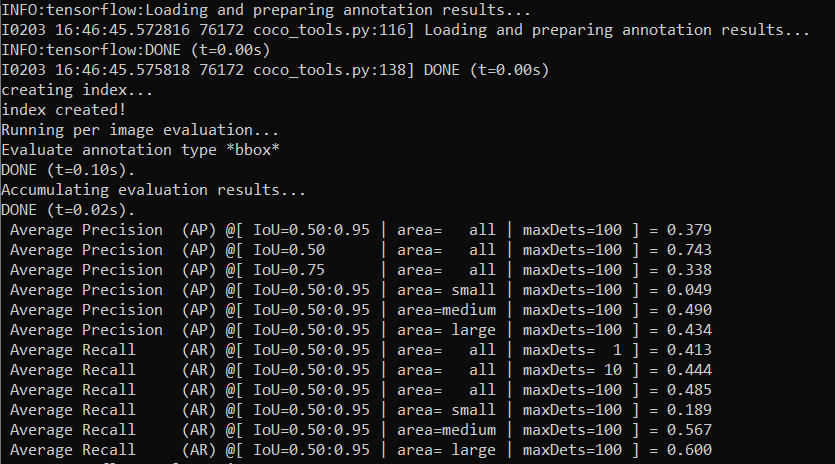

# 9. Load Train Model From Checkpoint

In [9]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [10]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 10. Detect from an Image

In [11]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [13]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'Test', 'Cars387.png')

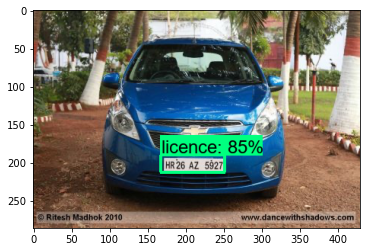

In [14]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

# 11. OCR

> **OCR[Optical Character Recognition]** is the method to extract text from the region of interest.

> The OCR module using here is *EasyOCR*. https://github.com/JaidedAI/EasyOCR

> Easyocr uses PyTorch.

In [19]:
!pip install easyocr

  Using cached opencv_python_headless-4.5.5.62-cp36-abi3-win_amd64.whl (35.3 MB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Using cached tifffile-2021.11.2-py3-none-any.whl (178 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached imageio-2.13.3-py3-none-any.whl (3.3 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\License Plate\\anpr\\Lib\\site-packages\\~il\\_imaging.cp38-win_amd64.pyd'
Check the permissions.



In [16]:
import easyocr

In [17]:
detection_threshold = 0.7

In [18]:
# Filtering the detection scores to get the license plate.
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [19]:
scores

[0.84814864]

In [20]:
width = image.shape[1]
height = image.shape[0]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[0.6668444  0.39061633 0.743573   0.5867238 ]
[190.71750629 167.96502084 212.66188085 252.29123592]
[([[5, 7], [85, 7], [85, 21], [5, 21]], 'HR 26 AZ  5927', 0.4080614045539895)]


D:\License Plate\anpr\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


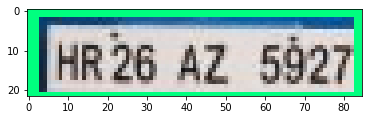

In [21]:
# Apply ROI filtering and OCR to the cropped image that contains only license plate.
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    plt.imshow(region)
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

# 12. OCR Filtering

In [25]:
region_threshold = 0.5

In [26]:
# This function is used to extract only license plate number and neglecting other texts.
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate

In [27]:
filter_text(region, ocr_result, region_threshold)

['HR 26 AZ  5927']

# 13. Complete OCR Function

In [28]:
region_threshold = 0.5

In [29]:
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    # Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    # Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    # Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


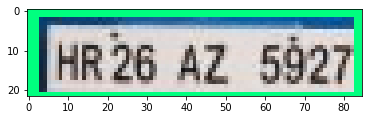

['HR 26 AZ  5927']


In [30]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

# 14. Saving the results in CSV

In [31]:
import csv
import uuid

In [32]:
def save_results(text, region, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), region)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

# 15. Real Time Detections from your Webcam

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


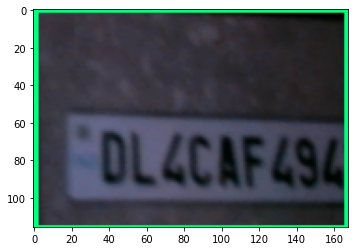

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


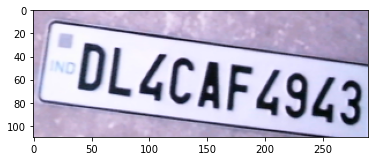

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


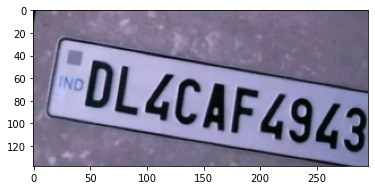

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


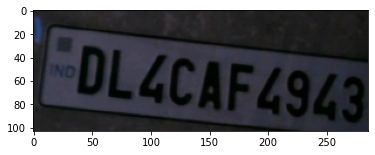

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


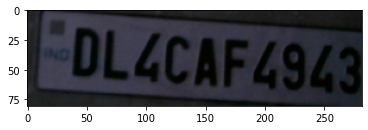

['DLLCAF L943']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


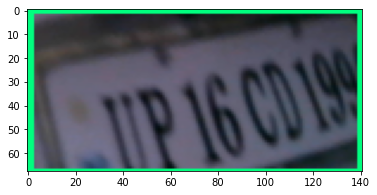

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['UPI6 CDIW']


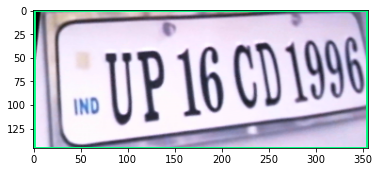

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['IP 16 CD1896']


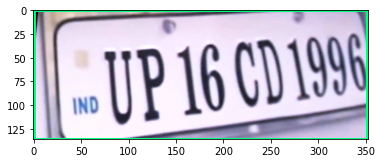

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['UP16 CDI9U6']


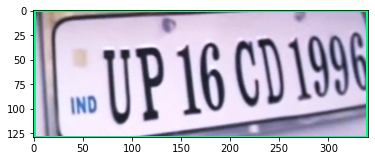

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['TP 16 CDIbU6']


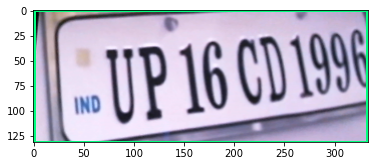

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['UP 16 CDIBUF']


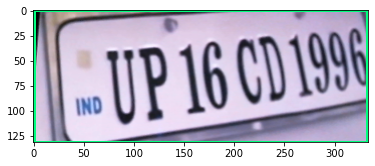

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


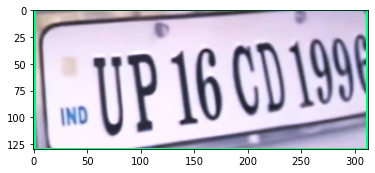

['TP1G CDI9UF']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


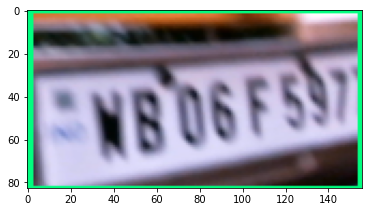

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


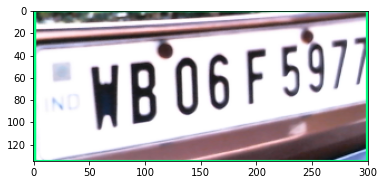

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


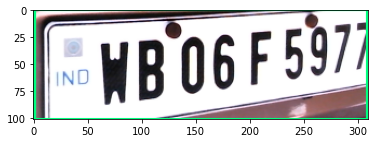

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


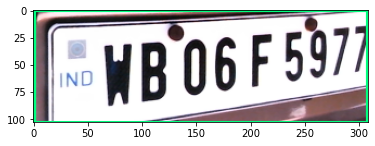

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MBO6 F 5971']


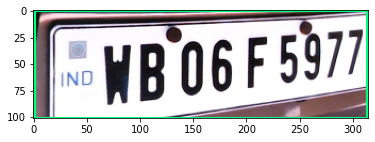

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['NB O6 F 5977']


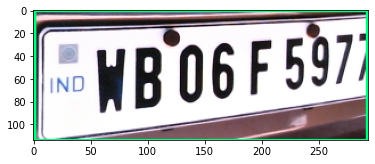

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MBO6F597']


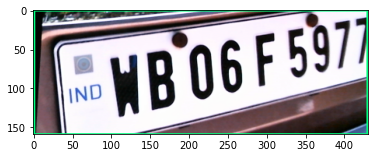

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


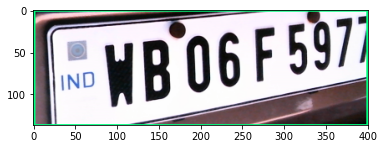

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['HB 06 F 5977']


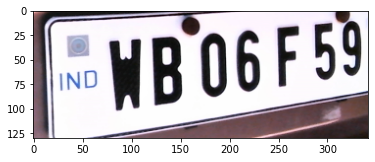

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MB 06 F59']


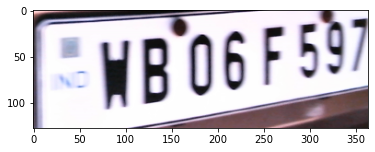

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['HB 06 F 597']


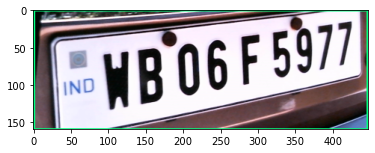

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


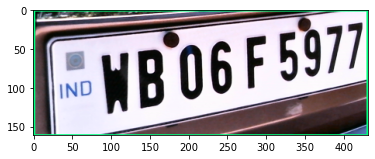

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


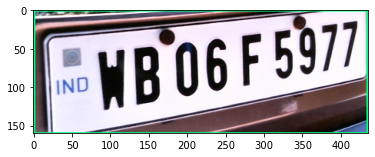

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


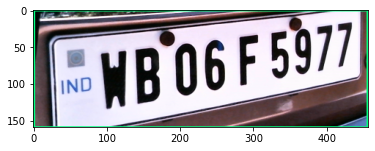

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


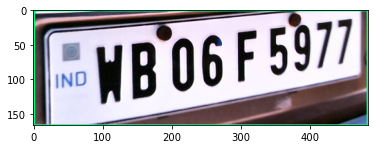

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


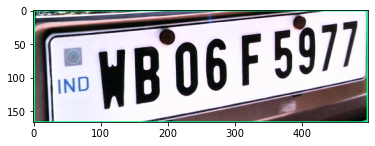

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['HB 06 F 5971']


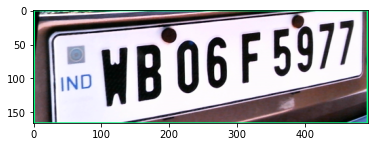

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


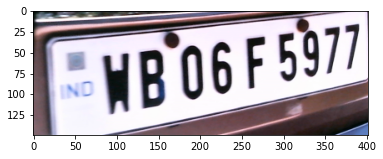

[]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


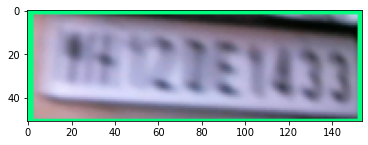

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['L']


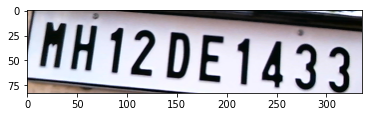

['NH12 DE1433']


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


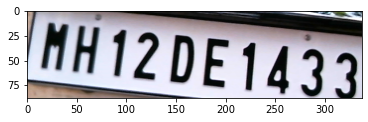

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['MHI2 DE1433']


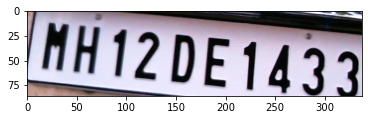

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


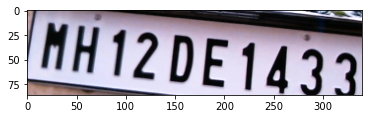

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['NH12 DE1433']


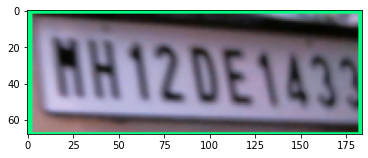

['mhizdelD']


In [33]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detected_images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 16. Freezing the Graph

In [16]:
# Freezing the Tensorflow Object Detection model graph.
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [17]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [19]:
!{command}

2022-01-25 19:43:02.428276: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-25 19:43:03.404922: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3493 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0125 19:43:04.942744 43580 deprecation.py:614] From D:\License Plate\anpr\lib\site-packages\tensorflow\python\autograph\impl\api.py:464: calling map